<a href="https://colab.research.google.com/github/sanjaysunil34/ML_assignment/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CST 395 -CSE Neural Networks and Deep Learning Assignment 1<br>
Submiited by: Thomas Ajai<br>
              S5 CSE<br>
              Roll no: 62 <br>
              TVE19CS064<br>


[github link](https://github.com/thomasajai001/Artificial-Neural-Network---Mnist-dataset)



[colab link](https://colab.research.google.com/drive/10RqXk3OEPv0tlqhB-bkI1bh-iAD3eXkW)

Importing necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist

Loading the mnist dataset

In [4]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Size of the training dataset

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Size of the testing dataset

In [6]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


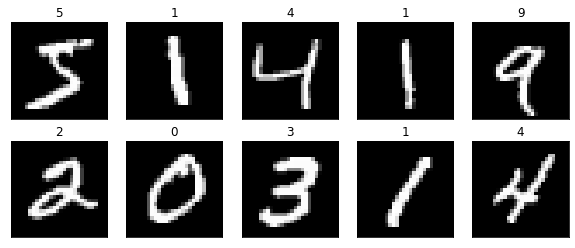

In [7]:
# Display some images
fig, axes = plt.subplots(ncols=5,nrows=2, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    x=i%2
    y=i%5

    axes[x,y].set_title(y_train[i])
    axes[x,y].imshow(X_train[i], cmap='gray')
    axes[x,y].get_xaxis().set_visible(False)
    axes[x,y].get_yaxis().set_visible(False)
plt.show()

In [8]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

### 1st Model

In [9]:
# Create simple Neural Network model
def model_1():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(learning_rate=0.01)

  # model.summary()

  model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
  return model

In [10]:
# evaluate a model using k-fold cross-validation
def evaluate_model(modelX):
    scores = list()
    # define model
    model = modelX()
    print(model.summary())
    # fit model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=1)
    print('Validation Accuarcy %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    return scores, history

In [11]:
# summarize history for accuracy
def plot(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Evaluating the 1st model

In [13]:
scores, history = evaluate_model(model_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3236 - acc: 0.8136 - val_loss: 0.5284 - val_acc: 0.8731
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4340 - acc: 0.8929 - val_loss: 0.3854 - val_acc: 0.9022
Epoch 3/10
1875/1875 [=====================

#### Plot Accuracy vs Epoch chart for Model 1

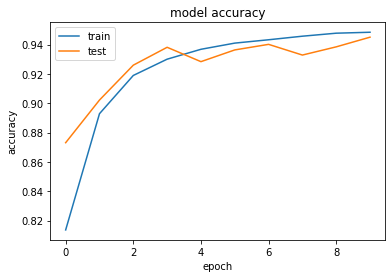

In [14]:
plot(history)

### 2nd Model

In [15]:
# Create simple Neural Network model
def model_2():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(learning_rate=0.01)

  # model.summary()

  model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
  return model

In [16]:
scores, history = evaluate_model(model_2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 128)               6528      
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 47,068
Trainable params: 47,068
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4484 - acc: 0.8715 - val_loss: 0.2697 - val_acc: 0.9145
Epoch 2/10
1875/1875 [=====================

#### Plot Accuracy vs Epoch chart for Model 2

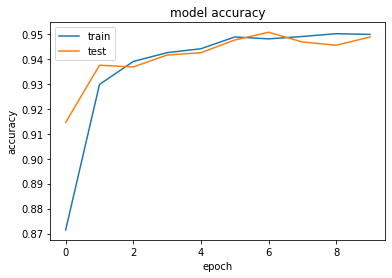

In [17]:
plot(history)